I'm interested in how the angle of incidence on a periodic grating affects the production of a Talbot carpet. I'm going to try to modify this example:

https://diffractio.readthedocs.io/en/latest/source/examples/reflection_refraction.html

and also referencing this example:
https://diffractio.readthedocs.io/en/latest/source/examples/talbot_effect.html

In [2]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

import numpy as np

In [19]:
wavelength = 0.7 * um
grateperiod = 1 * um
print(wavelength)
z_talbot = wavelength / (1 - np.sqrt(1 - (wavelength**2 / grateperiod**2)))
print(z_talbot)

x0 = np.linspace(-10 * um, 10 * um, 2048)
z0 = np.linspace(-100 * um, 8 * z_talbot * um, 8192)

gratestart = -4 * um
incident_angle = 1 # degrees

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
#u0.gauss_beam(A=1, x0=-50 * um, z0=100 * um, w0=150 * um, theta=0 * degrees)
u0.plane_wave(A=10, theta=incident_angle * degrees, z0=0)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)
u1.incident_field(u0)
u1.ronchi_grating(r0=(0, gratestart), period=grateperiod, fill_factor=0.1, length=200*um, height=4*um, Dx=0*um, 
                  refraction_index=0, heigth_substrate=4*um, refraction_index_substrate=1.0, angle=0 * degrees)

#u1.draw_refraction_index()

0.7
2.4487754897918355


In [20]:
u1.WPM()

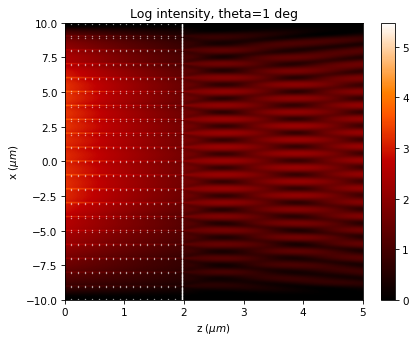

In [23]:
u1.draw(kind='intensity', logarithm=True, draw_borders=True)
plt.title(f'Log intensity, theta={incident_angle} deg')
# plt.axvline(z_talbot / 7)
# plt.axvline(z_talbot / 6)
# plt.axvline(z_talbot / 5)
# plt.axvline(z_talbot / 4)
# plt.axvline(z_talbot / 3)
# plt.axvline(z_talbot / 2)
# plt.axvline(z_talbot)
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-10, 10)
plt.savefig(f'fine_planewave_theta{incident_angle}', dpi=300)